Caleb - Looking at salaries of baseball players over time



In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns

<Axes: xlabel='playerID', ylabel='dollars_per_hit'>

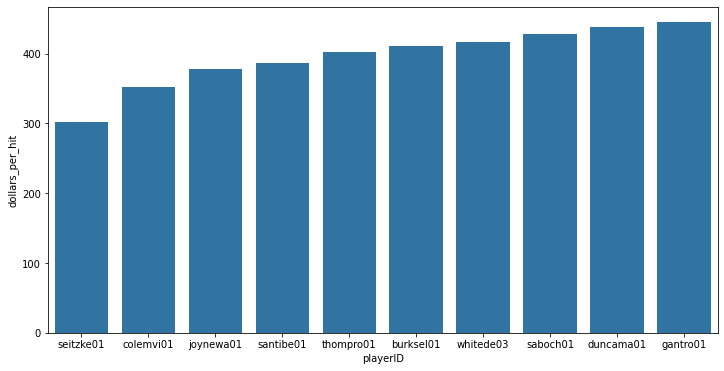

In [94]:
salary = pd.read_csv('Salaries.csv')
batting = pd.read_csv('Batting.csv')
# batting_salary = pd.merge(salary, batting, on='playerID', suffixes=('_salary', '_batting'))
batting_salary = pd.merge(salary, batting, on=['playerID', 'yearID', 'teamID', 'lgID'], suffixes=('_salary', '_batting'))


batting_salary['dollars_per_hit'] = batting_salary['salary'] / batting_salary['H']
batting_salary_filtered = batting_salary[(batting_salary['salary'] > 0) & (batting_salary['H'] > 0)]
batting_salary_sorted = batting_salary_filtered.sort_values(by='dollars_per_hit', ascending=True)
top_10_value_players = batting_salary_sorted.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='playerID', y='dollars_per_hit', data=top_10_value_players)


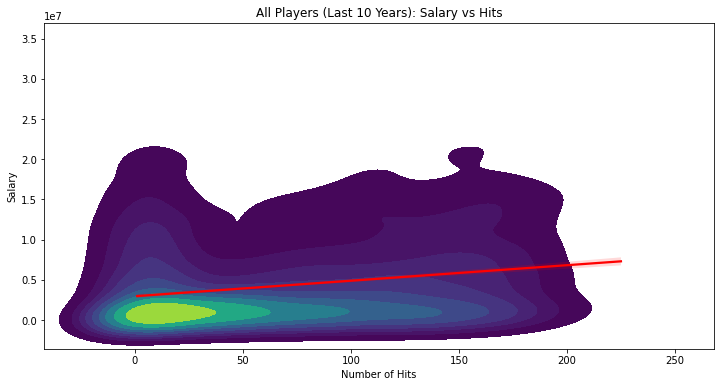

In [99]:
salary = pd.read_csv('Salaries.csv')
batting = pd.read_csv('Batting.csv')

# last 10 years
recent_years = batting['yearID'].max() - 10
batting_recent = batting[batting['yearID'] > recent_years]
salary_recent = salary[salary['yearID'] > recent_years]

batting_salary = pd.merge(salary_recent, batting_recent, on=['playerID', 'yearID', 'teamID', 'lgID'], suffixes=('_salary', '_batting'))
batting_salary['dollars_per_hit'] = batting_salary['salary'] / batting_salary['H']
batting_salary_filtered = batting_salary[(batting_salary['salary'] > 0) & (batting_salary['H'] > 0)]

plt.figure(figsize=(12, 6))
sns.kdeplot(x='H', y='salary', data=batting_salary_filtered, fill=True, cmap='viridis')
sns.regplot(x='H', y='salary', data=batting_salary_filtered, scatter=False, color='red')
plt.title('All Players (Last 10 Years): Salary vs Hits')
plt.xlabel('Number of Hits')
plt.ylabel('Salary')
plt.show()


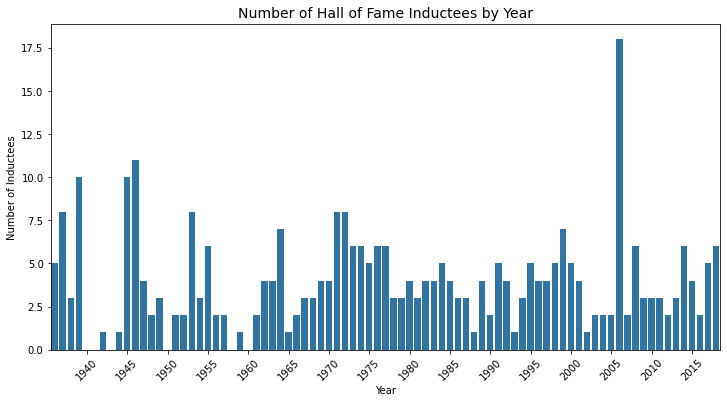

In [95]:
hof = pd.read_csv('HallOfFame.csv')
hof_inducted = hof[hof['inducted'] == 'Y']
hof_by_year = hof_inducted.groupby('yearid').size().reset_index(name='count')

min_year = hof_by_year['yearid'].min()
max_year = hof_by_year['yearid'].max()
all_years = pd.DataFrame({'yearid': range(min_year, max_year + 1)})
hof_by_year = pd.merge(all_years, hof_by_year, on='yearid', how='left').fillna(0)
hof_by_year['count'] = hof_by_year['count'].astype(int)
years_to_show = hof_by_year['yearid'][hof_by_year['yearid'] % 5 == 0]

plt.figure(figsize=(12, 6))
sns.barplot(x='yearid', y='count', data=hof_by_year)
plt.title('Number of Hall of Fame Inductees by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Inductees')
plt.xticks(ticks=hof_by_year[hof_by_year['yearid'].isin(years_to_show)].index, labels=years_to_show, rotation=45)
plt.show()
